# Generating X-Y-Composition Correspondences

### Inputs: 
   - Locations $x_0$ and $y_0$ and associated spread $\sigma$ of $N$ sources
   - Points $\{(x,y)\}$

### Outputs:
   - Triplets of x, y, Pymatgen Composition objects associated with each point
   
   
#### Upshot: This will be useful for machine learning pipelines, where we can map from position to Composition

In [6]:
import scipy
from pymatgen.core import Composition, Element
from typing import List
import numpy as np

## Define `ElementSource` class with location, $\sigma$, Element

In [7]:
class ElementSource(object):
    
    def __init__(self,x0:float,y0:float,sigma:float,element:Element, intensity: float = 1.):
        
        self.x0 = x0
        self.y0 = y0
        self.sigma = sigma
        self.element = element
        self.intensity = intensity
        

    def pdf(self,x,y):
        
        prefactor = 1/(self.sigma **2 * 2 * np.pi)
        
        return self.intensity * prefactor \
            * np.exp( -(x-self.x0)**2 / (2* self.sigma **2))\
            * np.exp( -(y - self.y0)**2 /(2*self.sigma **2))

## Define function to combine element sources at a given point

In [8]:
def combine_element_sources(x:float,y:float, sources: List[ElementSource],normalize: bool = True)->Composition:
    
    elements = {}
    
    for src in sources:
        elements[src.element] = src.pdf(x,y)
    
    
    
    if normalize:
        elt_sum = np.sum(list(elements.values()))
        
        for key in elements.keys():
            elements[key] /= elt_sum
    
    return Composition(elements)



## Demonstration : Gold, Silver, Copper

In [9]:
from  pprint import pprint
src1 = ElementSource(0,0,.5,Element('Cu'))
src2 = ElementSource(1,0,1,Element('Ag'))
src3 = ElementSource(0,1,1,Element('Au'))


print(src1.pdf(0,0))
print(src2.pdf(0,0))


points = []
for x in np.linspace(0,1,10):
    for y in np.linspace(0,1,10):
        comp = combine_element_sources(x,y,[src1,src2,src3])
        points.append((x,y,comp))
        
pprint(points[:5])

0.6366197723675814
0.09653235263005391
[(0.0, 0.0, Comp: Cu0.76730346 Ag0.11634827 Au0.11634827),
 (0.0, 0.1111111111111111, Comp: Cu0.7535304 Ag0.11639546 Au0.13007414),
 (0.0, 0.2222222222222222, Comp: Cu0.73141269 Ag0.11943324 Au0.14915407),
 (0.0, 0.3333333333333333, Comp: Cu0.69972502 Ag0.12534372 Au0.17493126),
 (0.0, 0.4444444444444444, Comp: Cu0.65704153 Ag0.13398786 Au0.20897061)]


Simple Visualization

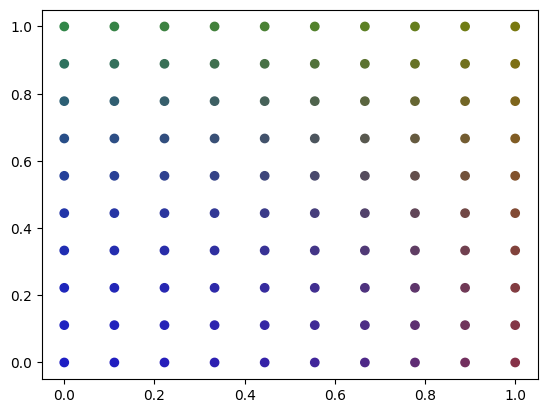

In [10]:
import matplotlib.pyplot as plt



def comp_to_color(comp:Composition,comp_to_color:dict = None)->tuple:
    
    
    compdict = comp.as_dict()
    elts = sorted(list(compdict.keys()))
    #print(elts)
    values = [compdict[key] for key in elts]
    norm = sum(values)
    
    color_tup = tuple(values/norm)
    
    return color_tup

colors = [comp_to_color(pt[2]) for pt in points]
X = [pt[0] for pt in points]
Y = [pt[1] for pt in points]
#print(colors)
plt.scatter(X,Y,c=colors)


In [11]:
print(colors)

[(0.11634826880944932, 0.11634826880944932, 0.7673034623811015), (0.11639545829485448, 0.13007414415944824, 0.7535303975456973), (0.11943324167284727, 0.1491540687843399, 0.7314126895428128), (0.12534372185601977, 0.17493125562879605, 0.6997250225151842), (0.133987856216011, 0.2089706089484495, 0.6570415348355395), (0.14505714548234072, 0.25282140417725424, 0.6021214503404051), (0.1578865697699573, 0.3075210465662999, 0.5345923836637428), (0.171287953991258, 0.37283048759980775, 0.4558815584089342), (0.1835396837055762, 0.44644659851726654, 0.37001371777715725), (0.1926856677319286, 0.523773949200199, 0.28354038306787244), (0.13007414415944824, 0.11639545829485448, 0.7535303975456973), (0.13009328979043047, 0.13009328979043044, 0.7398134204191391), (0.1333868058224947, 0.14906229902520604, 0.7175508951522993), (0.13980952865984383, 0.1746009717425042, 0.6855894995976519), (0.14918339887983886, 0.20820220509327725, 0.642614396026884), (0.16113743150689552, 0.2513137245221574, 0.58754884